In [1]:
import numpy as np
from PIL import Image
import matplotlib.pylab as plt
from scipy import stats

In [2]:
Calibracion = 81.9010

In [3]:
def variables(matrix,Cal):
    x=[]
    y=[]
    L_filas = len(matrix[:,0])
    L_columnas = len(matrix[0,:])
    for i in range(L_filas):
        for j in range(L_columnas):
            if matrix[i,j]==255:
                x.append(j)
                y.append(L_filas-1-i)
    x=np.asarray(x)/Cal
    y=np.asarray(y)/Cal
    grad, inter, r_value, p_value, std_err = stats.linregress(x,y)
    return x, y, grad

In [4]:
def contorno(matrix,Cal):
    XM=[]
    Xm=[]
    YM=[]
    Ym=[]
    L_filas = len(matrix[:,0])
    L_columnas = len(matrix[0,:])
    #Maximos
    for j in range(L_columnas):
        for i in range(L_filas):
            if matrix[i,j]==255:
                XM.append(j)
                YM.append(L_filas-1-i)
                break
    #Minimos            
    for j in range(L_columnas):
        for i in range(L_filas):
            if matrix[L_filas-1-i,j]==255:
                Xm.append(j)
                Ym.append(i)
                break

    XM=np.asarray(XM)/Cal
    YM=np.asarray(YM)/Cal
    Xm=np.asarray(Xm)/Cal
    Ym=np.asarray(Ym)/Cal
    return XM, YM, Xm, Ym

In [16]:
def diametro_y_altura(archivo,Cal):
    imagen = Image.open(archivo)
    matrix = np.array(imagen)
    x, y, grad = variables(matrix,1)
    imagen_rotada = imagen.rotate(-np.arctan(grad)*180/np.pi, expand=True)
    matrix_rotada = np.array(imagen_rotada)
    xM, yM, xm, ym = contorno(matrix_rotada,Cal)
    diametros = yM-ym
    D = np.mean(diametros)
    s = np.sqrt(np.var(diametros))
    D_filtrado = []
    for i in diametros:
        if i<D+2*s and i>D-2*s:
            D_filtrado.append(i)
    D_prom = np.mean(D_filtrado)
    err = np.sqrt(np.var(D_filtrado))
    
    plt.figure(figsize=(15,6))
    plt.plot(xM,yM)
    plt.plot(xm,ym)

    plt.figure()
    plt.plot(xM,diametros)
    plt.plot(xM,np.ones_like(xM)*D,'m')
    plt.plot(xM,np.ones_like(xM)*D_prom,'r')
    plt.plot(xM,np.ones_like(xM)*(D-2*s),'g')
    plt.plot(xM,np.ones_like(xM)*(D+2*s),'g')
    plt.grid()
    plt.ylim([D-2*s,D+2*s])

#ALTURA
#     matrix_transp = np.matrix.transpose(matrix_rotada)
#     xMtr, yMtr, xmtr, ymtr = contorno(matrix_transp,Cal)
#     longitudes = yMtr-ymtr
#     L = np.mean(longitudes)
#     sL = np.sqrt(np.var(longitudes))
#     L_filtrado = []
#     for i in longitudes:
#         if i<L+2*sL and i>L-2*sL:
#             L_filtrado.append(i)
#     L_prom = np.mean(L_filtrado)
#     errL = np.sqrt(np.var(L_filtrado))
    
#     plt.figure(figsize=(15,6))
#     plt.plot(xMtr,yMtr)
#     plt.plot(xmtr,ymtr)

#     plt.figure()
#     plt.plot(xMtr,longitudes)
#     plt.plot(xMtr,np.ones_like(xMtr)*L,'m')
#     plt.plot(xMtr,np.ones_like(xMtr)*L_prom,'r')
#     plt.plot(xMtr,np.ones_like(xMtr)*(L-2*sL),'g')
#     plt.plot(xMtr,np.ones_like(xMtr)*(L+2*sL),'g')
#     plt.ylim([L-sL,L+sL])
#     plt.grid()

    L_prom=max(xM)-min(xm)
    errL = 0
    return D_prom, err, L_prom, errL

(1.4792372532697102, 0.6708148084793412, 35.00567758635426, 0)

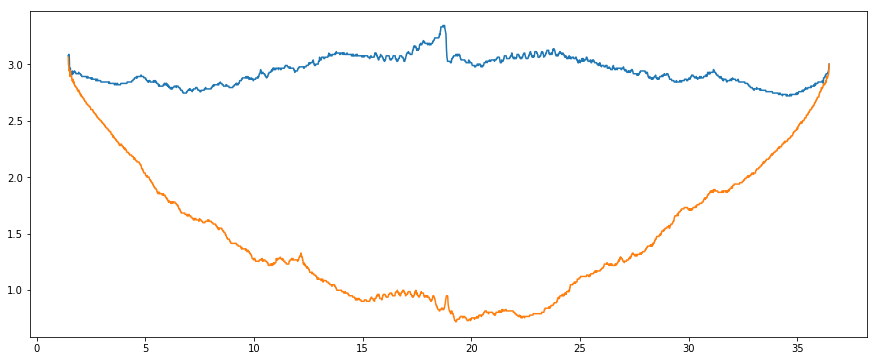

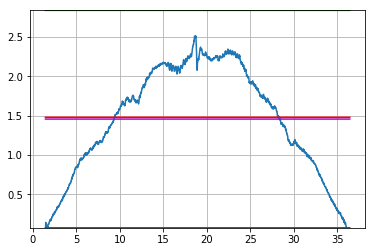

In [18]:
diametro_y_altura('CilCon1.png',Calibracion)

In [44]:
diametro_y_altura('CilindroBW62.png',Calibracion)

(1.689843018462434, 0.07086354639527392, 14.30760587679836, 1.9290084290944942)